In [2]:
import numpy as np
from scipy.stats import bernoulli
import pandas as pd
import math
import matplotlib.pyplot as plt

Setting

In [3]:
def f_rew(delta):
    x1 = bernoulli.rvs(p = (0.5 + 0.5*delta), size = 100000)
    x2 = bernoulli.rvs(p = (0.5 - 0.5*delta), size = 100000)
    x = np.array([x1,x2]).T
    return x

In [4]:
def model_normal(delta):
    x = f_rew(delta)
    N = 100000
    d = 2
    u_a = np.zeros(d)
    Nt_a = np.zeros(d)
    sum_rewards = np.zeros(d)
    pseudo_regrets = []
    #loop in t
    for t in range(1,N):
        UCB_values = np.zeros(d)
        for i in range(0,d):
            if (Nt_a[i] > 0):
                ln_t = math.log(t)
                #computing UCB value
                u_a[i] = sum_rewards[i]/Nt_a[i]
                ucb_value = u_a[i] + math.sqrt(1.5*(ln_t/Nt_a[i]))
                UCB_values[i] = ucb_value
            #can't divide by zero so we put it equal to 1
            else:
                UCB_values[i] = 1e500
        #select max ucb
        action_selected = np.argmax(UCB_values)
        #update values
        Nt_a[action_selected] += 1
        reward = x[t, action_selected]
        sum_rewards[action_selected] += reward
        #computing pseudo regret
        pseudo_regret = max(u_a) - u_a[action_selected]
        pseudo_regrets.append(pseudo_regret)
    return np.cumsum(pseudo_regrets)

In [5]:
def model_opt(delta):
    x = f_rew(delta)
    N = 100000
    d = 2
    u_a = np.zeros(d)
    Nt_a = np.zeros(d)
    sum_rewards = np.zeros(d)
    pseudo_regrets = []
    #loop in t
    for t in range(1,N):
        UCB_values = np.zeros(d)
        for i in range(0,d):
            if (Nt_a[i] > 0):
                ln_t = math.log(t)
                #computing UCB value
                u_a[i] = sum_rewards[i]/Nt_a[i]
                ucb_value = u_a[i] + math.sqrt(ln_t/Nt_a[i])
                UCB_values[i] = ucb_value
            #can't divide by zero so we put it equal to 1
            else:
                UCB_values[i] = 1e500
        #select max ucb
        action_selected = np.argmax(UCB_values)
        #update values
        Nt_a[action_selected] += 1
        reward = x[t, action_selected]
        sum_rewards[action_selected] += reward
        #computing pseudo regret
        pseudo_regret = max(u_a) - u_a[action_selected]
        pseudo_regrets.append(pseudo_regret)
    return np.cumsum(pseudo_regrets)

Experiments

In [6]:
epsilons = [1/4, 1/8, 1/16]

In [7]:
ucb_normal_values = []
for epsilon in epsilons:
    pseudo_regrets_list = []
    for i in range(20):
        pseudo_regret_result = model_normal(epsilon)
        pseudo_regrets_list.append(pseudo_regret_result)
    ucb_normal_values.append(np.array(pseudo_regrets_list))

In [8]:
ucb_opt_values = []
for epsilon in epsilons:
    pseudo_regrets_list = []
    for i in range(20):
        pseudo_regret_result = model_opt(epsilon)
        pseudo_regrets_list.append(pseudo_regret_result)
    ucb_opt_values.append(np.array(pseudo_regrets_list))

In [9]:
# calculate the mean and std for the 20 runs of the ucb algorithm
ucb_normal_means = [np.mean(experiment, axis=0) for experiment in ucb_normal_values]
ucb_normal_stds = [np.std(experiment, axis=0) for experiment in ucb_normal_values]
ucb_normal_up = [[mean + std for mean,std in zip(ucb_normal_means[i], ucb_normal_stds[i])] for i in range(len(ucb_normal_means))]
ucb_normal_bottom = [[mean - std for mean,std in zip(ucb_normal_means[i], ucb_normal_stds[i])] for i in range(len(ucb_normal_means))]

In [10]:
# calculate the mean and std for the 20 runs of the optimized ucb algorithm
ucb_opt_means = [np.mean(experiment, axis=0) for experiment in ucb_opt_values]
ucb_opt_stds = [np.std(experiment, axis=0) for experiment in ucb_opt_values]
ucb_opt_up = [[mean + std for mean,std in zip(ucb_opt_means[i], ucb_opt_stds[i])] for i in range(len(ucb_opt_means))]
ucb_opt_bottom = [[mean - std for mean,std in zip(ucb_opt_means[i], ucb_opt_stds[i])] for i in range(len(ucb_opt_means))]

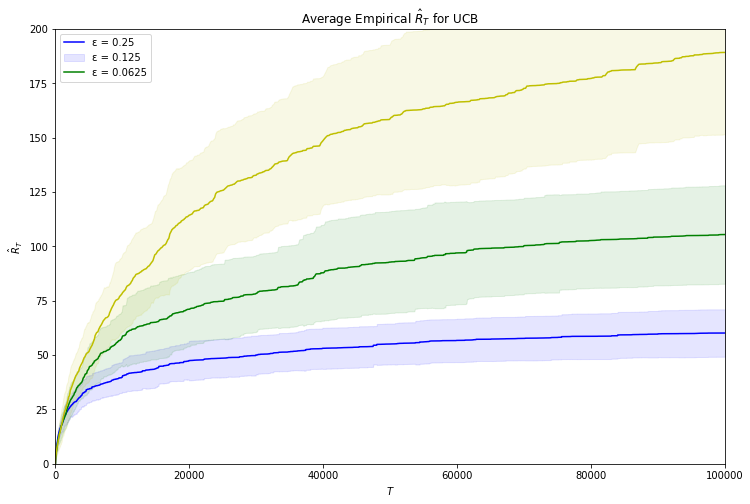

In [43]:
# graph ucp algorithm
t_values = np.arange(99999)
fig, ax = plt.subplots(1, 1, figsize=[12, 8], sharex="col")
colors = ['b','g','y']
legend = ["ε = 0.25", "ε = 0.125", "ε = 0.0625"]
alpha = 0.1
for i in range(len(ucb_normal_means)):
    ax.plot(t_values, ucb_normal_means[i], color=colors[i])
    ax.fill_between(t_values, ucb_normal_up[i], ucb_normal_bottom[i],
                       color=colors[i], alpha=alpha)
ax.legend(legend)
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\hat{R}_{T}$")
ax.set_xlim([0, 100000])
ax.set_ylim([0, 200])
ax.set_title(r"Average Empirical $\hat{R}_{T}$ for UCB")

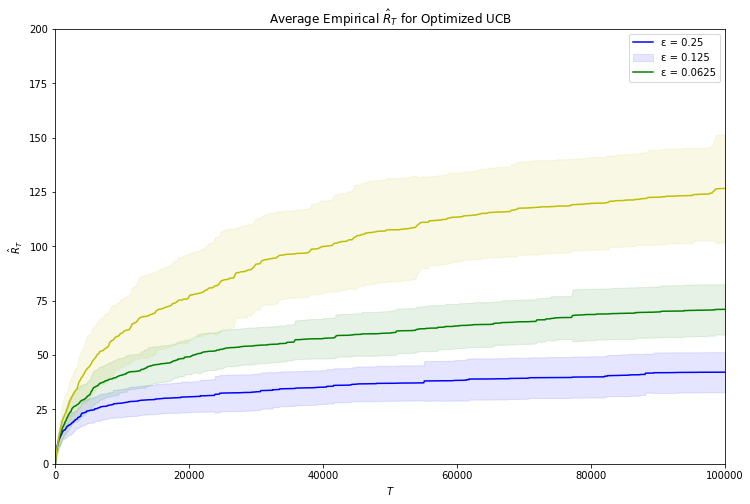

In [42]:
#graph optimized ucb algorithm
t_values = np.arange(99999)
fig, ax = plt.subplots(1, 1, figsize=[12, 8], sharex="col")
colors = ['b','g','y']
legend = ["ε = 0.25", "ε = 0.125", "ε = 0.0625"]
alpha = 0.1
for i in range(len(ucb_opt_means)):
    ax.plot(t_values, ucb_opt_means[i], color=colors[i])
    ax.fill_between(t_values, ucb_opt_up[i], ucb_opt_bottom[i],
                       color=colors[i], alpha=alpha)
ax.legend(legend)
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\hat{R}_{T}$")
ax.set_xlim([0, 100000])
ax.set_ylim([0, 200])
ax.set_title(r"Average Empirical $\hat{R}_{T}$ for Optimized UCB")